<a href="https://colab.research.google.com/github/young-hyun-park/capston_design/blob/main/NIH_data_sample_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/capstone/Data_Entry_2017_v2020.csv')

In [ ]:
df

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
0,00000001_000.png,Cardiomegaly,0,1,57,M,PA,2682,2749,0.143,0.143
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168
3,00000002_000.png,No Finding,0,2,80,M,PA,2500,2048,0.171,0.171
4,00000003_001.png,Hernia,0,3,74,F,PA,2500,2048,0.168,0.168
...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001.png,Mass|Pneumonia,1,30801,38,M,PA,2048,2500,0.168,0.168
112116,00030802_000.png,No Finding,0,30802,28,M,PA,2048,2500,0.168,0.168
112117,00030803_000.png,No Finding,0,30803,42,F,PA,2048,2500,0.168,0.168
112118,00030804_000.png,No Finding,0,30804,29,F,PA,2048,2500,0.168,0.168


In [ ]:
len(df[df['Finding Labels'] == 'No Finding'])

60361

In [ ]:
len(df['Image Index'].values)

112120

In [ ]:
df['Finding Labels']=df['Finding Labels'].str.replace('|',',')

In [ ]:
df

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
0,00000001_000.png,Cardiomegaly,0,1,57,M,PA,2682,2749,0.143,0.143
1,00000001_001.png,"Cardiomegaly,Emphysema",1,1,58,M,PA,2894,2729,0.143,0.143
2,00000001_002.png,"Cardiomegaly,Effusion",2,1,58,M,PA,2500,2048,0.168,0.168
3,00000002_000.png,No Finding,0,2,80,M,PA,2500,2048,0.171,0.171
4,00000003_001.png,Hernia,0,3,74,F,PA,2500,2048,0.168,0.168
...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001.png,"Mass,Pneumonia",1,30801,38,M,PA,2048,2500,0.168,0.168
112116,00030802_000.png,No Finding,0,30802,28,M,PA,2048,2500,0.168,0.168
112117,00030803_000.png,No Finding,0,30803,42,F,PA,2048,2500,0.168,0.168
112118,00030804_000.png,No Finding,0,30804,29,F,PA,2048,2500,0.168,0.168


In [ ]:
value_series=df['Finding Labels'].value_counts()

In [ ]:
value_dict = dict()
for i in range(len(value_series)):
  index = df['Finding Labels'].value_counts().index[i].split(',')
  if len(index) < 2:
    value_dict[index[0]] =  df['Finding Labels'].value_counts()[i]

In [ ]:
value_dict

{'Atelectasis': 4215,
 'Cardiomegaly': 1093,
 'Consolidation': 1310,
 'Edema': 628,
 'Effusion': 3955,
 'Emphysema': 892,
 'Fibrosis': 727,
 'Hernia': 110,
 'Infiltration': 9547,
 'Mass': 2139,
 'No Finding': 60361,
 'Nodule': 2705,
 'Pleural_Thickening': 1126,
 'Pneumonia': 322,
 'Pneumothorax': 2194}

In [ ]:
dict_disease = dict()
for i in range(len(value_series)):
  index = df['Finding Labels'].value_counts().index[i].split(',')
  if len(index) > 1:
    for dis in index:
      value_dict[dis]+=df['Finding Labels'].value_counts()[i]

In [ ]:
value_dict

{'Atelectasis': 11559,
 'Cardiomegaly': 2776,
 'Consolidation': 4667,
 'Edema': 2303,
 'Effusion': 13317,
 'Emphysema': 2516,
 'Fibrosis': 1686,
 'Hernia': 227,
 'Infiltration': 19894,
 'Mass': 5782,
 'No Finding': 60361,
 'Nodule': 6331,
 'Pleural_Thickening': 3385,
 'Pneumonia': 1431,
 'Pneumothorax': 5302}

In [ ]:
sorted_dict =dict(sorted(value_dict.items(), key = lambda item: item[1],reverse=True))
print(sorted_dict)

{'No Finding': 60361, 'Infiltration': 19894, 'Effusion': 13317, 'Atelectasis': 11559, 'Nodule': 6331, 'Mass': 5782, 'Pneumothorax': 5302, 'Consolidation': 4667, 'Pleural_Thickening': 3385, 'Cardiomegaly': 2776, 'Emphysema': 2516, 'Edema': 2303, 'Fibrosis': 1686, 'Pneumonia': 1431, 'Hernia': 227}


In [ ]:
list(sorted_dict.values())[1]

19894

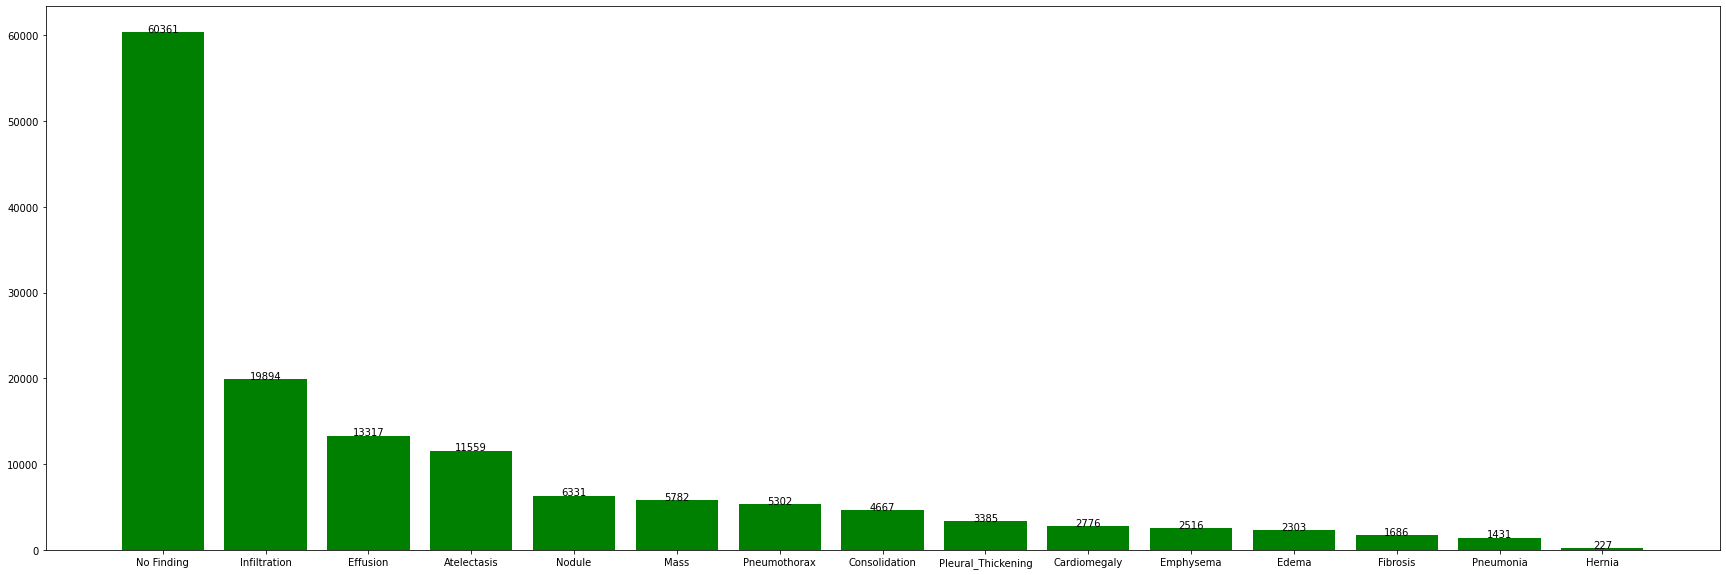

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot()
bars=plt.bar(list(sorted_dict.keys()), sorted_dict.values(), color='g')
for i, b in enumerate(bars):
    ax.text(b.get_x()+b.get_width()*(1/2),b.get_height()+20, \
           list(sorted_dict.values())[i],ha='center',fontsize = 10)
plt.show()